In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

In [9]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Finding the best number of cluster
** กรณีที่ไม่มีเฉลย

the criteria of picking the best number of cluster is :
- The number should be the lowest
- while the slope should be where it begin slowly decrease.
- In the example below we pick 3 to be the best number, because its slope isn't too high and it is the lowest number

c:\Users\rastu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rastu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rastu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rastu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

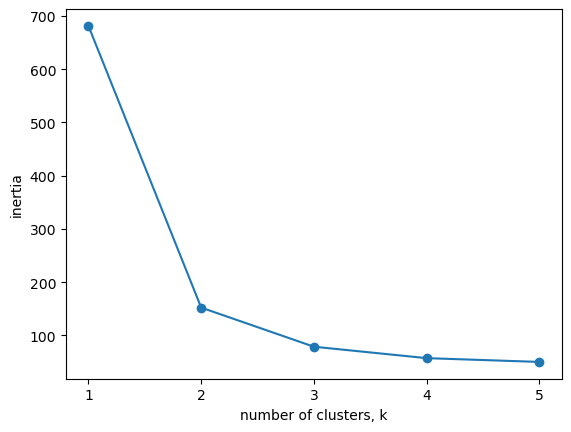

In [11]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(iris['data'])
    
    # Append the inertia to the list of inertias ( แรงเฉื่อย )
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Model Evaluation
*** กรณีมีเฉลย
- ดูการกระจายตัวของ data ว่าไปอยู่ที่กลุ่มไหนบ้าง

In [12]:
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(iris['data'])

mapping = {0: "setosa", 1: "versicolor", 2: "virginica"}
varieties = np.array([mapping[x] for x in iris['target']])

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct , เพื่อดูการกระจายตัวของ cluster ( ยิ่งกระจายน้อย = model แบ่งกลุ่มได้ดี )
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  setosa  versicolor  virginica
labels                                  
0              50           0          0
1               0          48         14
2               0           2         36


c:\Users\rastu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## In case of variance in each columns is too different
( กรณีที่ Data มีค่า variance หรือ การกระจายตัวในแต่ละ Column ไม่เท่ากัน )
- จะส่งผลให้การ cluster model แต่ละกลุ่มได้แย่ลง
- จึงควรใช้ ```StandardScaler``` เพื่อปรับให้ค่า Min, Max ของทุก column อยู่ใน range เดียวกัน

In [13]:
### for example

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(iris['data'])

# Calculate the cluster labels: labels
labels = pipeline.predict(iris['data'])

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels' : labels, 'species' : varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  setosa  versicolor  virginica
labels                                
0            33           0          0
1             0          46         50
2            17           4          0


c:\Users\rastu\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
